In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(X_train,y_train),(X_test, y_test)=keras.datasets.mnist.load_data()
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

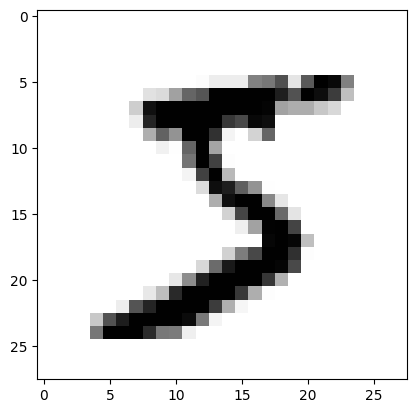

In [ ]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [ ]:
print(f"The images present in the Training Dataset are: {len(X_train)}, and the images present in the Testing Dataset are: {len(X_test)}")
print(f"The shape of  images are: {X_train[0].shape}")

The images present in the Training Dataset are: 60000, and the images present in the Testing Dataset are: 10000
The shape of  images are: (28, 28)


In [ ]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [ ]:
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

input_layer = tf.keras.layers.Input(shape=(28, 28, 1))

model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9959 - loss: 0.0235 - val_accuracy: 0.9781 - val_loss: 0.4034
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.9962 - loss: 0.0221 - val_accuracy: 0.9783 - val_loss: 0.4895
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9957 - loss: 0.0290 - val_accuracy: 0.9788 - val_loss: 0.4212
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9963 - loss: 0.0252 - val_accuracy: 0.9789 - val_loss: 0.4391
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9960 - loss: 0.0240 - val_accuracy: 0.9795 - val_loss: 0.4594


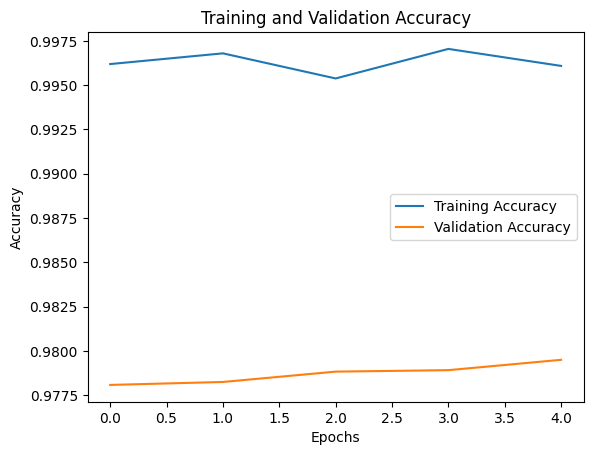

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

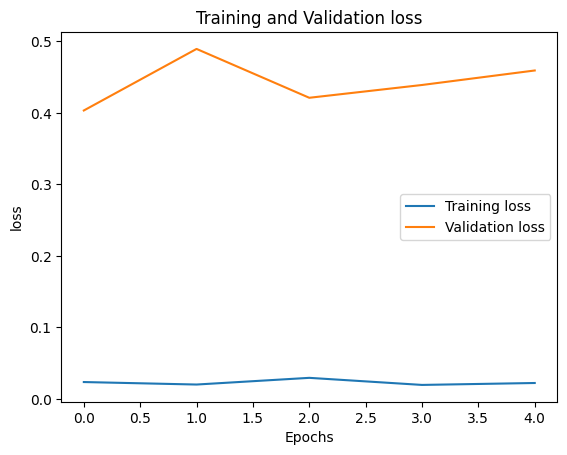

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


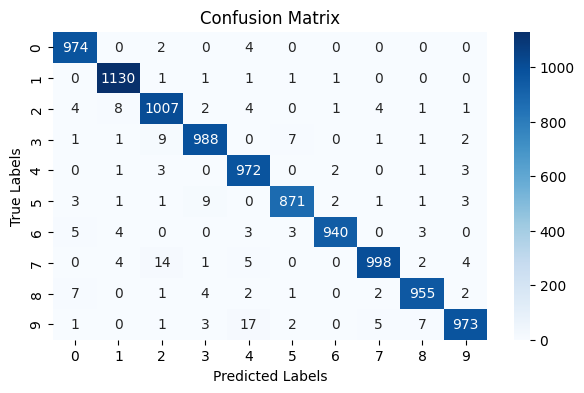

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss, accuracy=model.evaluate(X_test, y_test)
print('Test loss:', {loss})
print('Test Accuracy:', {accuracy})

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9748 - loss: 0.5127
Test loss: {0.40660184621810913}
Test Accuracy: {0.9807999730110168}
